In [1]:
!pip install yfinance


[*********************100%***********************]  1 of 1 completed


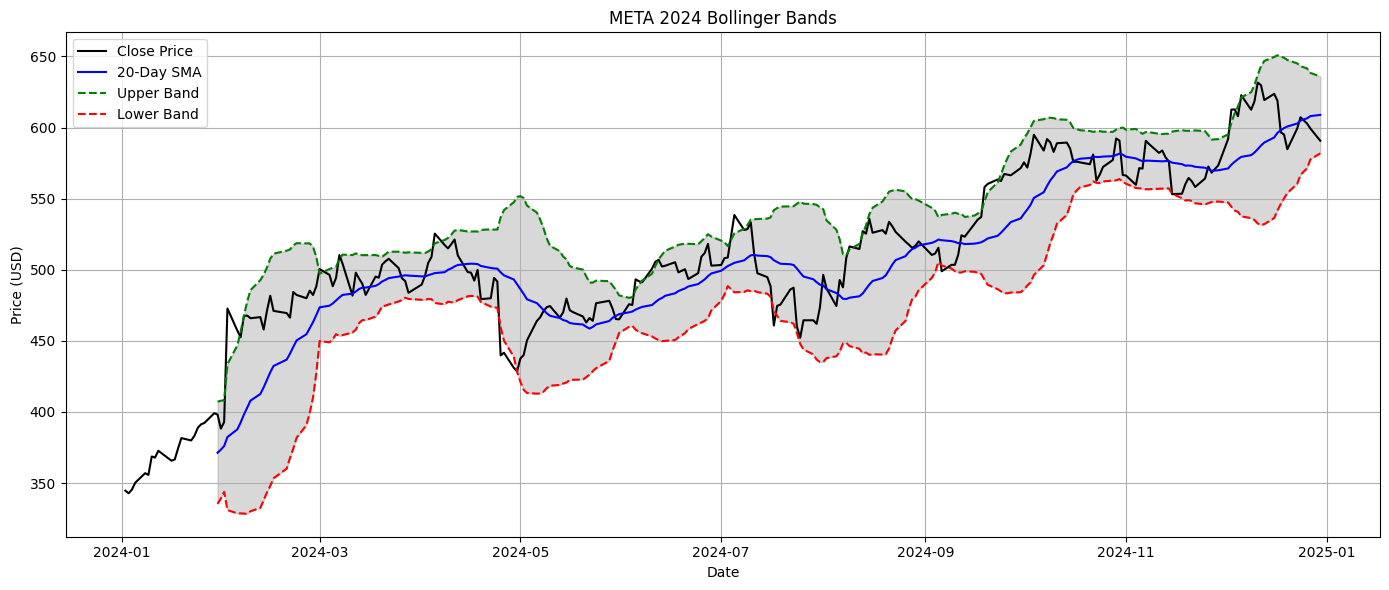

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download Meta stock price data for 2024
meta = yf.download("META", start="2024-01-01", end="2024-12-31")

# Calculate 20-day Simple Moving Average and Standard Deviation
window = 20
meta['SMA20'] = meta['Close'].rolling(window=window).mean()
meta['STD20'] = meta['Close'].rolling(window=window).std()

# Calculate Bollinger Bands
meta['UpperBand'] = meta['SMA20'] + 2 * meta['STD20']
meta['LowerBand'] = meta['SMA20'] - 2 * meta['STD20']

In [ ]:
# Plot the Bollinger Bands
plt.figure(figsize=(14, 6))
plt.plot(meta['Close'], label='Close Price', color='black')
plt.plot(meta['SMA20'], label='20-Day SMA', color='blue')
plt.plot(meta['UpperBand'], label='Upper Band', color='grey', linestyle='--')
plt.plot(meta['LowerBand'], label='Lower Band', color='grey', linestyle='--')
plt.fill_between(meta.index, meta['UpperBand'], meta['LowerBand'], color='gray', alpha=0.3)
plt.title('Bollinger Bands META 2024')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Monte Carlo

[*********************100%***********************]  1 of 1 completed
<ipython-input-21-b0c1ab9c925f>:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mu = float(log_returns.mean())           # Daily return
<ipython-input-21-b0c1ab9c925f>:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma = float(log_returns.std())         # Daily volatility
<ipython-input-21-b0c1ab9c925f>:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(close_prices.iloc[-1])        # Last close price of 2024


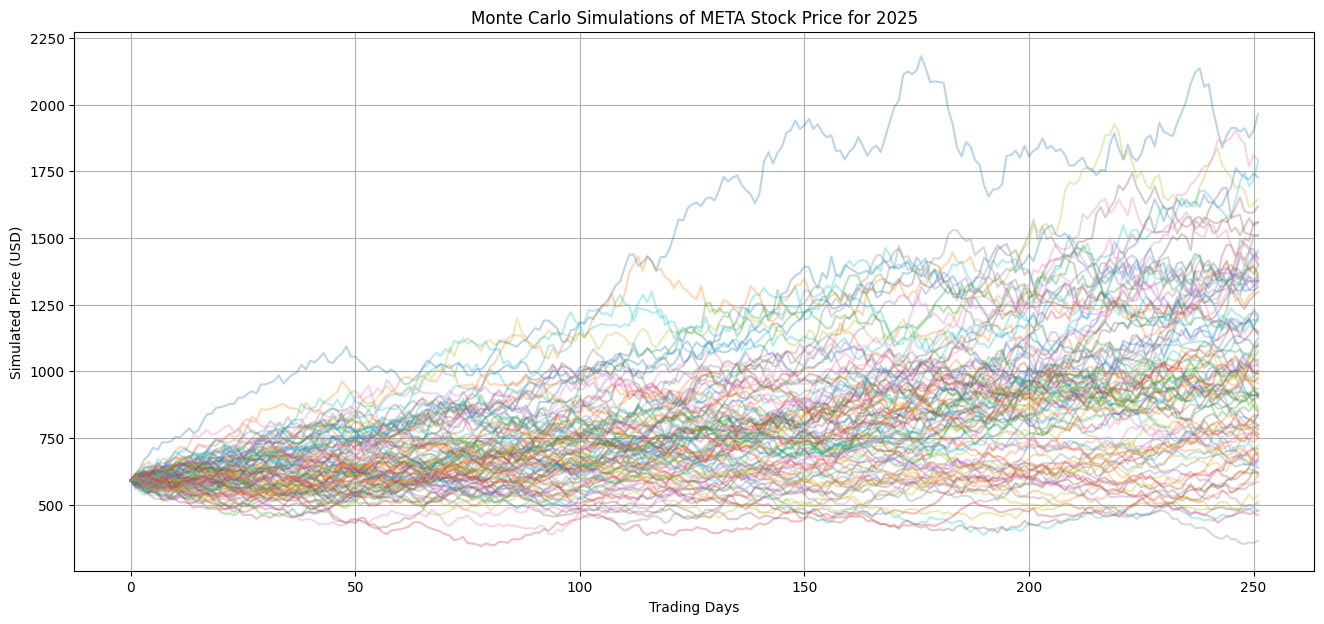

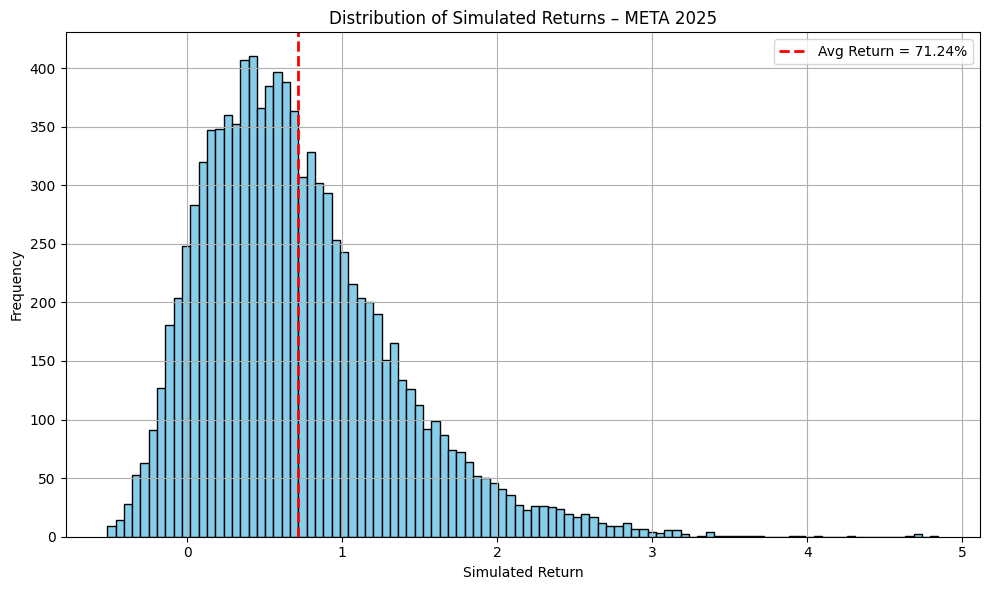

📊 95% Confidence Interval for Price on Dec 31, 2025: $472.93 to $1919.17
📈 Average Simulated Return: 71.24%
📉 Standard Deviation of Return: 62.60%


In [21]:
# STEP 1: Setup & install dependencies
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# STEP 2: Download META 2024 data
meta = yf.download("META", start="2024-01-01", end="2024-12-31")
close_prices = meta['Close'].dropna()

# STEP 3: Calculate log returns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

# STEP 4: Extract parameters as floats
mu = float(log_returns.mean())           # Daily return
sigma = float(log_returns.std())         # Daily volatility
S0 = float(close_prices.iloc[-1])        # Last close price of 2024

# STEP 5: Monte Carlo Simulation
days = 252
simulations = 10000

np.random.seed(42)
simulated_prices = np.zeros((days, simulations))
simulated_prices[0] = S0

for t in range(1, days):
    z = np.random.standard_normal(simulations)  # Random draws
    drift = mu - 0.5 * sigma**2
    shock = sigma * z
    simulated_prices[t] = simulated_prices[t - 1] * np.exp(drift + shock)

# STEP 6: Plot simulated paths (first 100)
plt.figure(figsize=(16, 7))
plt.plot(simulated_prices[:, :100], alpha=0.3)
plt.title("Monte Carlo Simulations of META Stock Price for 2025")
plt.xlabel("Trading Days")
plt.ylabel("Simulated Price (USD)")
plt.grid(True)
plt.show()

# STEP 7: Histogram of final returns
final_prices = simulated_prices[-1]
returns = (final_prices - S0) / S0

plt.figure(figsize=(10, 6))
plt.hist(returns, bins=100, color='skyblue', edgecolor='black')
plt.axvline(returns.mean(), color='red', linestyle='--', linewidth=2, label=f'Avg Return = {returns.mean():.2%}')
plt.title("Distribution of Simulated Returns – META 2025")
plt.xlabel("Simulated Return")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 8: Confidence interval and statistics
lower_bound = np.percentile(final_prices, 2.5)
upper_bound = np.percentile(final_prices, 97.5)
avg_return = returns.mean()
std_return = returns.std()

print(f"📊 95% Confidence Interval for Price on Dec 31, 2025: ${lower_bound:.2f} to ${upper_bound:.2f}")
print(f"📈 Average Simulated Return: {avg_return:.2%}")
print(f"📉 Standard Deviation of Return: {std_return:.2%}")
